# Classification of  malignant (cancer) and benign (not cancer) breast masses.

In [1]:
#Importing All required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [3]:
pd.set_option("display.max_columns",1000)
pd.set_option("display.max_rows",1000)

# The Data

Let's start by reading in the brca.csv file into a pandas dataframe.

In [4]:
br = pd.read_csv("brca.csv")
br.head()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,x.radius_se,x.texture_se,x.perimeter_se,x.area_se,x.smoothness_se,x.compactness_se,x.concavity_se,x.concave_pts_se,x.symmetry_se,x.fractal_dim_se,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [5]:
br.shape

(569, 32)

In [6]:
df= br.iloc[:,1:]

In [7]:
df['y'].unique()

array(['B', 'M'], dtype=object)

In [8]:
df.head()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,x.radius_se,x.texture_se,x.perimeter_se,x.area_se,x.smoothness_se,x.compactness_se,x.concavity_se,x.concave_pts_se,x.symmetry_se,x.fractal_dim_se,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [9]:
df.shape

(569, 31)

In [10]:
df.describe()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,x.radius_se,x.texture_se,x.perimeter_se,x.area_se,x.smoothness_se,x.compactness_se,x.concavity_se,x.concave_pts_se,x.symmetry_se,x.fractal_dim_se,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## EDA

In [11]:
# Check for any null values present
df.isnull().sum()

x.radius_mean          0
x.texture_mean         0
x.perimeter_mean       0
x.area_mean            0
x.smoothness_mean      0
x.compactness_mean     0
x.concavity_mean       0
x.concave_pts_mean     0
x.symmetry_mean        0
x.fractal_dim_mean     0
x.radius_se            0
x.texture_se           0
x.perimeter_se         0
x.area_se              0
x.smoothness_se        0
x.compactness_se       0
x.concavity_se         0
x.concave_pts_se       0
x.symmetry_se          0
x.fractal_dim_se       0
x.radius_worst         0
x.texture_worst        0
x.perimeter_worst      0
x.area_worst           0
x.smoothness_worst     0
x.compactness_worst    0
x.concavity_worst      0
x.concave_pts_worst    0
x.symmetry_worst       0
x.fractal_dim_worst    0
y                      0
dtype: int64

Check for Outliers 

In [12]:
# Defining a function for plotting histplot
def histplots(df, colored=False):
    k = 0
    cols = df.columns[:-1]
    n = 5
    m = 6
    fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(15, 10))
    for i in range(n):
        for j in range(m):
            if colored:
                sns.histplot(df, x=df[df.columns[k]], ax=axes[i][j], kde=True, hue=df.columns[-1])
            else:
                sns.histplot(df, x=df[df.columns[k]], ax=axes[i][j], kde=True, color='g')
            k += 1

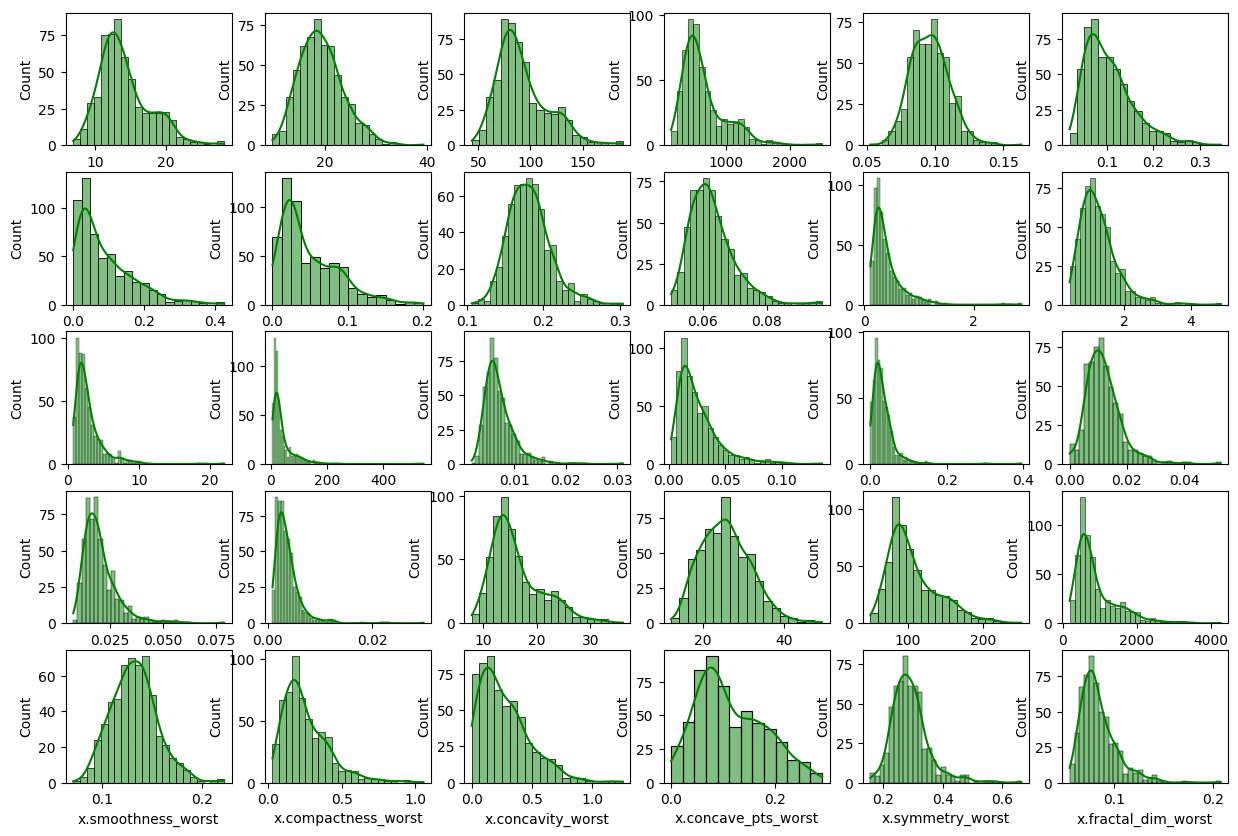

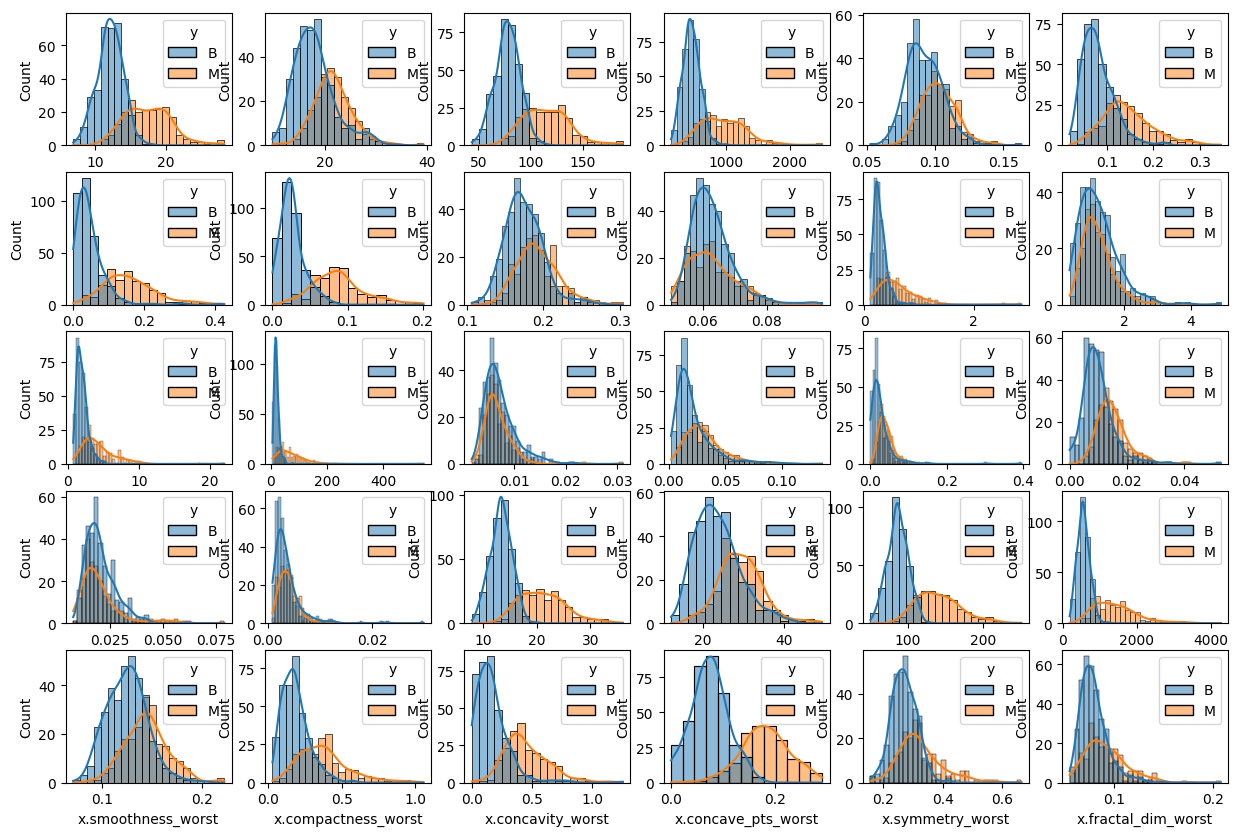

In [13]:

histplots(df, False)
histplots(df, True)

In [14]:
# column_names = df.columns

# # Set the figure size and layout
# fig, axs = plt.subplots(len(column_names), figsize=(10, 8 * len(column_names)))
# fig.tight_layout(pad=5)

# # Iterate over each column using enumerate
# for i, column in enumerate(column_names):
#     # Select the current axis
#     ax = axs[i]
    
#     # Plot the boxplot of the current column
#     sns.boxplot(data=df[column], ax=ax)
    
#     # Set the title of the subplot
#     ax.set_title(f"Boxplot of {column}")

# # Show the plot
# plt.show()

In [15]:
df.columns

Index(['x.radius_mean', 'x.texture_mean', 'x.perimeter_mean', 'x.area_mean',
       'x.smoothness_mean', 'x.compactness_mean', 'x.concavity_mean',
       'x.concave_pts_mean', 'x.symmetry_mean', 'x.fractal_dim_mean',
       'x.radius_se', 'x.texture_se', 'x.perimeter_se', 'x.area_se',
       'x.smoothness_se', 'x.compactness_se', 'x.concavity_se',
       'x.concave_pts_se', 'x.symmetry_se', 'x.fractal_dim_se',
       'x.radius_worst', 'x.texture_worst', 'x.perimeter_worst',
       'x.area_worst', 'x.smoothness_worst', 'x.compactness_worst',
       'x.concavity_worst', 'x.concave_pts_worst', 'x.symmetry_worst',
       'x.fractal_dim_worst', 'y'],
      dtype='object')

In [16]:
num_var =['x.radius_mean', 'x.texture_mean', 'x.perimeter_mean', 'x.area_mean',
       'x.smoothness_mean', 'x.compactness_mean', 'x.concavity_mean',
       'x.concave_pts_mean', 'x.symmetry_mean', 'x.fractal_dim_mean',
       'x.radius_se', 'x.texture_se', 'x.perimeter_se', 'x.area_se',
       'x.smoothness_se', 'x.compactness_se', 'x.concavity_se',
       'x.concave_pts_se', 'x.symmetry_se', 'x.fractal_dim_se',
       'x.radius_worst', 'x.texture_worst', 'x.perimeter_worst',
       'x.area_worst', 'x.smoothness_worst', 'x.compactness_worst',
       'x.concavity_worst', 'x.concave_pts_worst', 'x.symmetry_worst',
       'x.fractal_dim_worst']

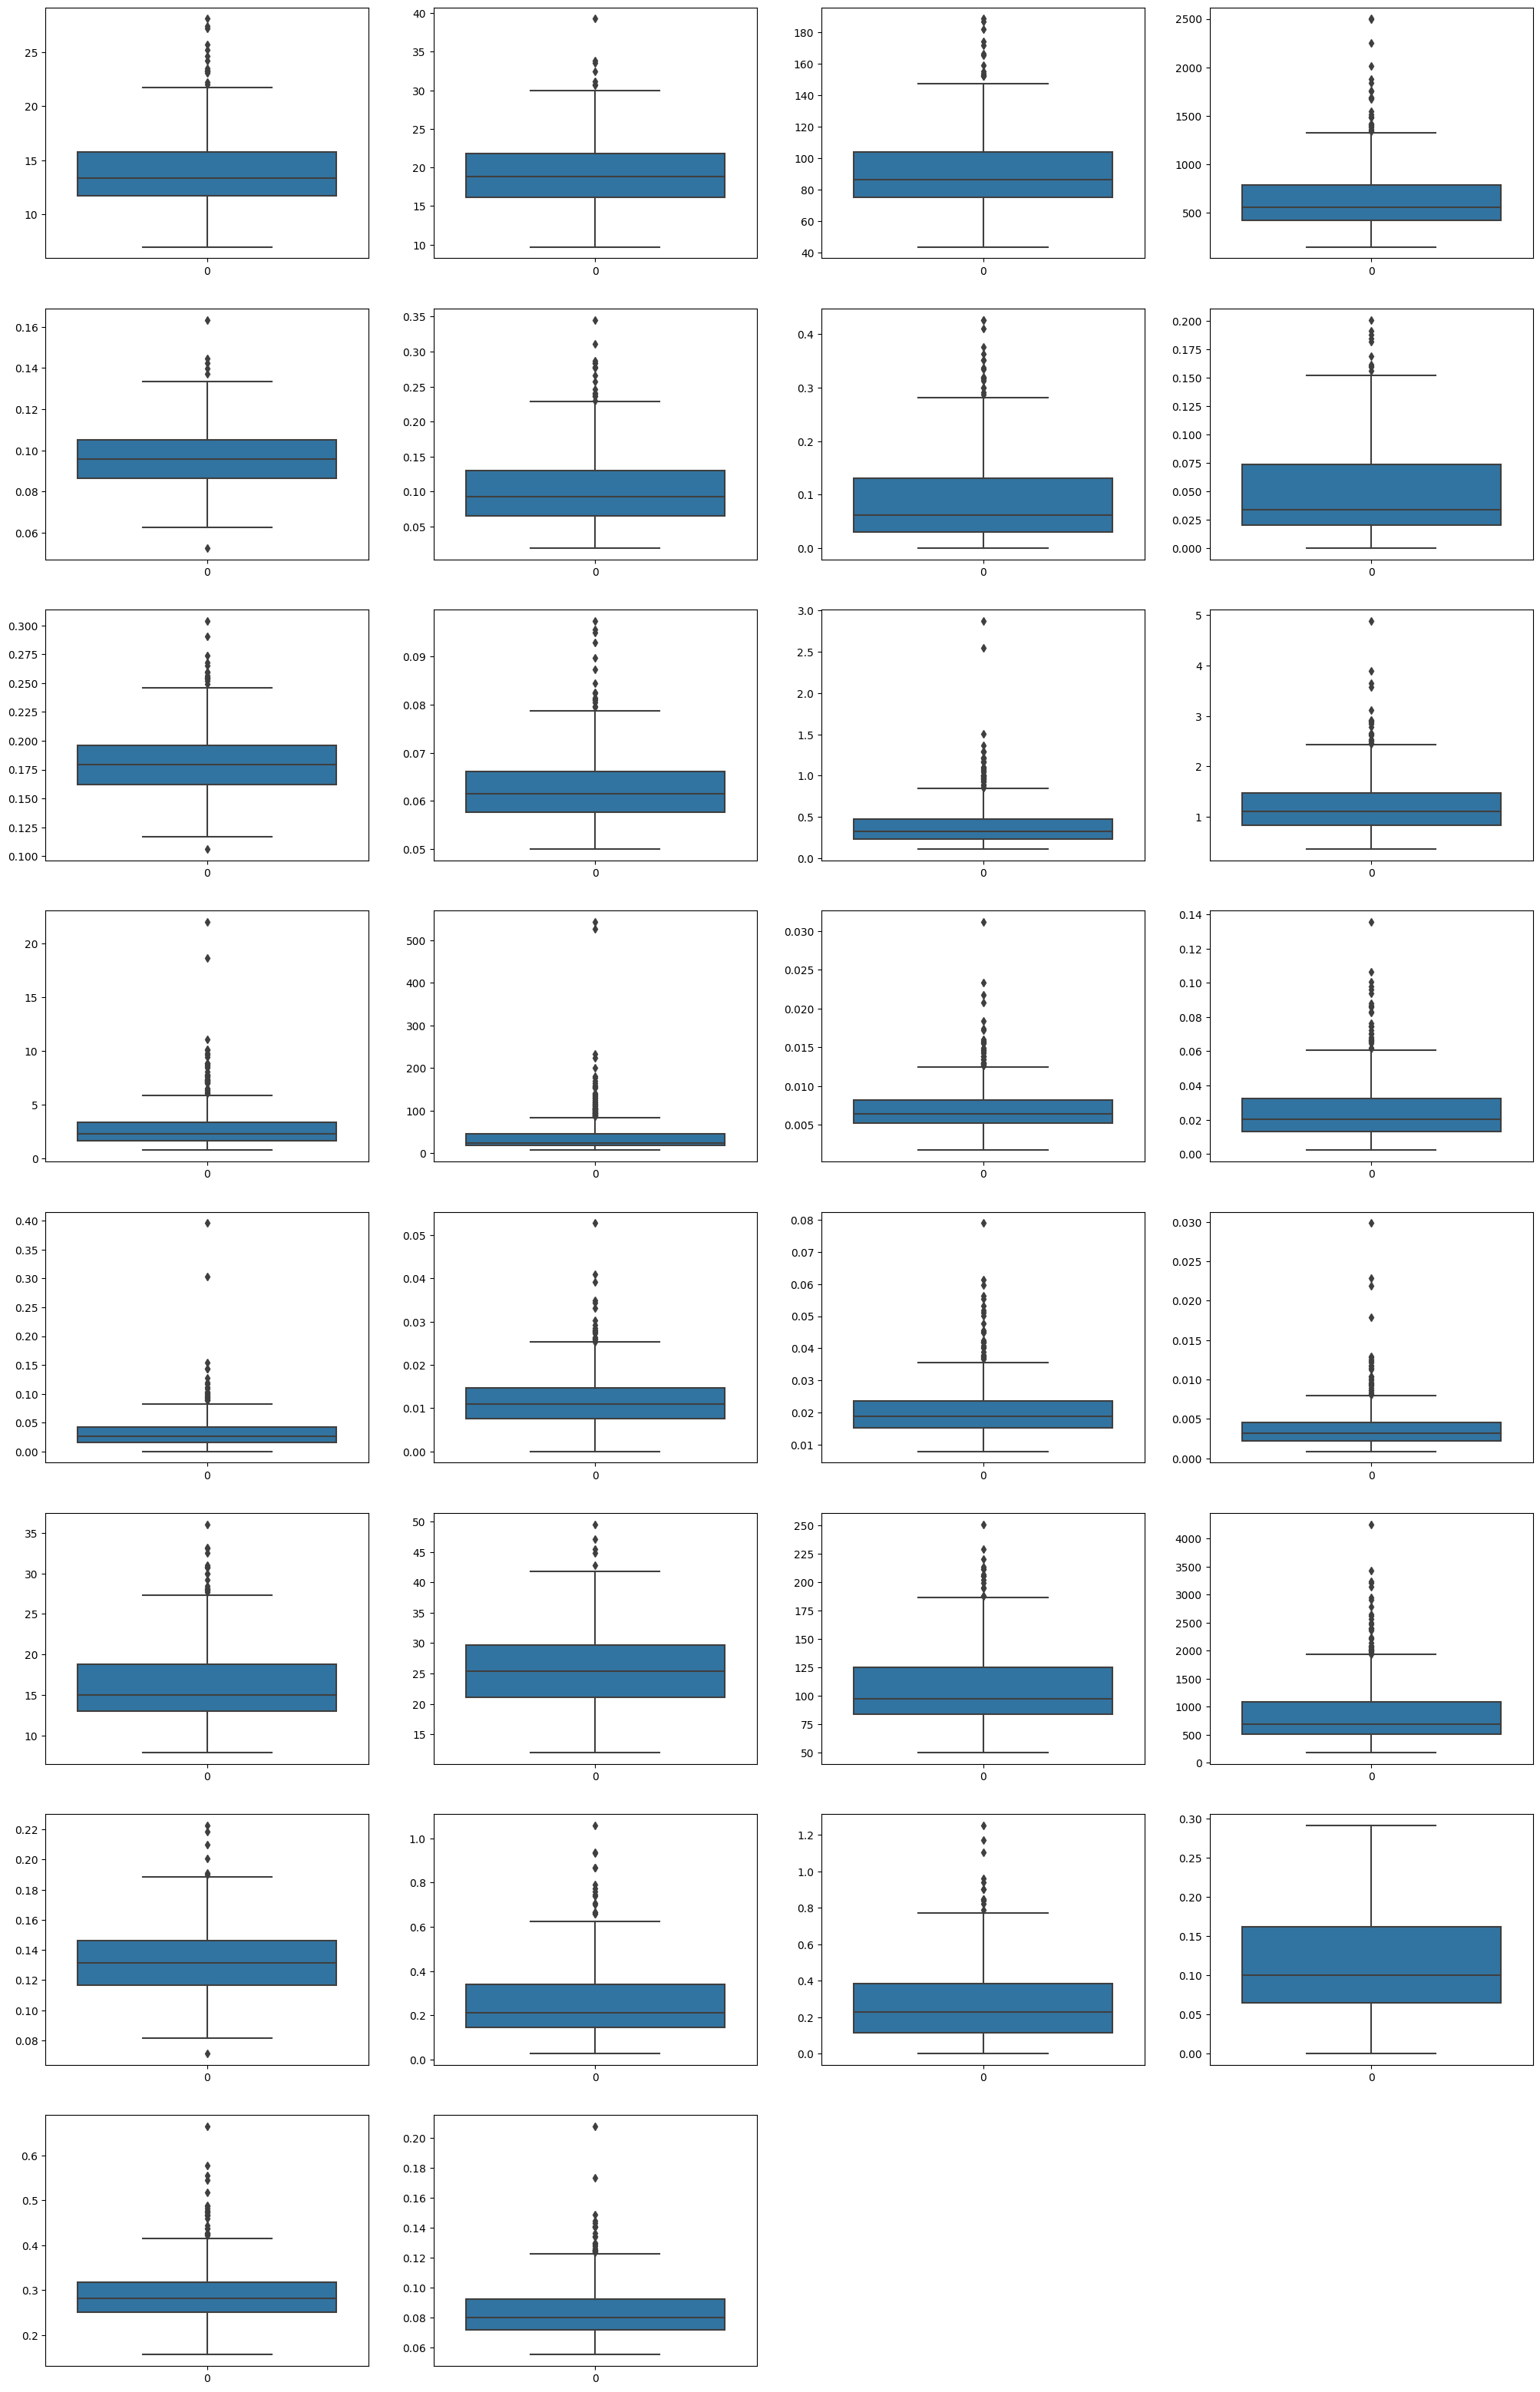

In [17]:
plt.figure(figsize=(25,45))
for i, var in enumerate(num_var):
    plt.subplot(9,4,i+1)
    sns.boxplot(df[var])

As we can seee there are outliers present in almost all columns

In [18]:
# Defining a function to remove outliers
def outliers_removal(df, i):
    perc = np.percentile(df[i], [0, 25, 50, 75, 100])
    iqr = perc[3] - perc[1]
    _min = perc[1] - 1.5*iqr
    _max = perc[3] + 1.5*iqr
    df.loc[df[i] > _max, i] = _max #replace the outlied value by threshold max value
    df.loc[df[i] < _min, i] = _min #replace the outlied value by threshold min value
    return df



In [19]:
#Another Approach but in this method outliers rows will be eliminated not replaced which results in very less data
# def remove_outliers_iqr(df, column):
#     # Calculate the first quartile (Q1)
#     Q1 = df[column].quantile(0.25)
    
#     # Calculate the third quartile (Q3)
#     Q3 = df[column].quantile(0.75)
    
#     # Calculate the IQR
#     IQR = Q3 - Q1
    
#     # Define the lower and upper bounds
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     # Filter the dataframe to remove outliers
#     filtered_df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    
#     return filtered_df

In [20]:
# Removing Outliers from a dataframe
for col in df.columns[:-1]:
    df = outliers_removal(df, col)

In [21]:
df.shape

(569, 31)

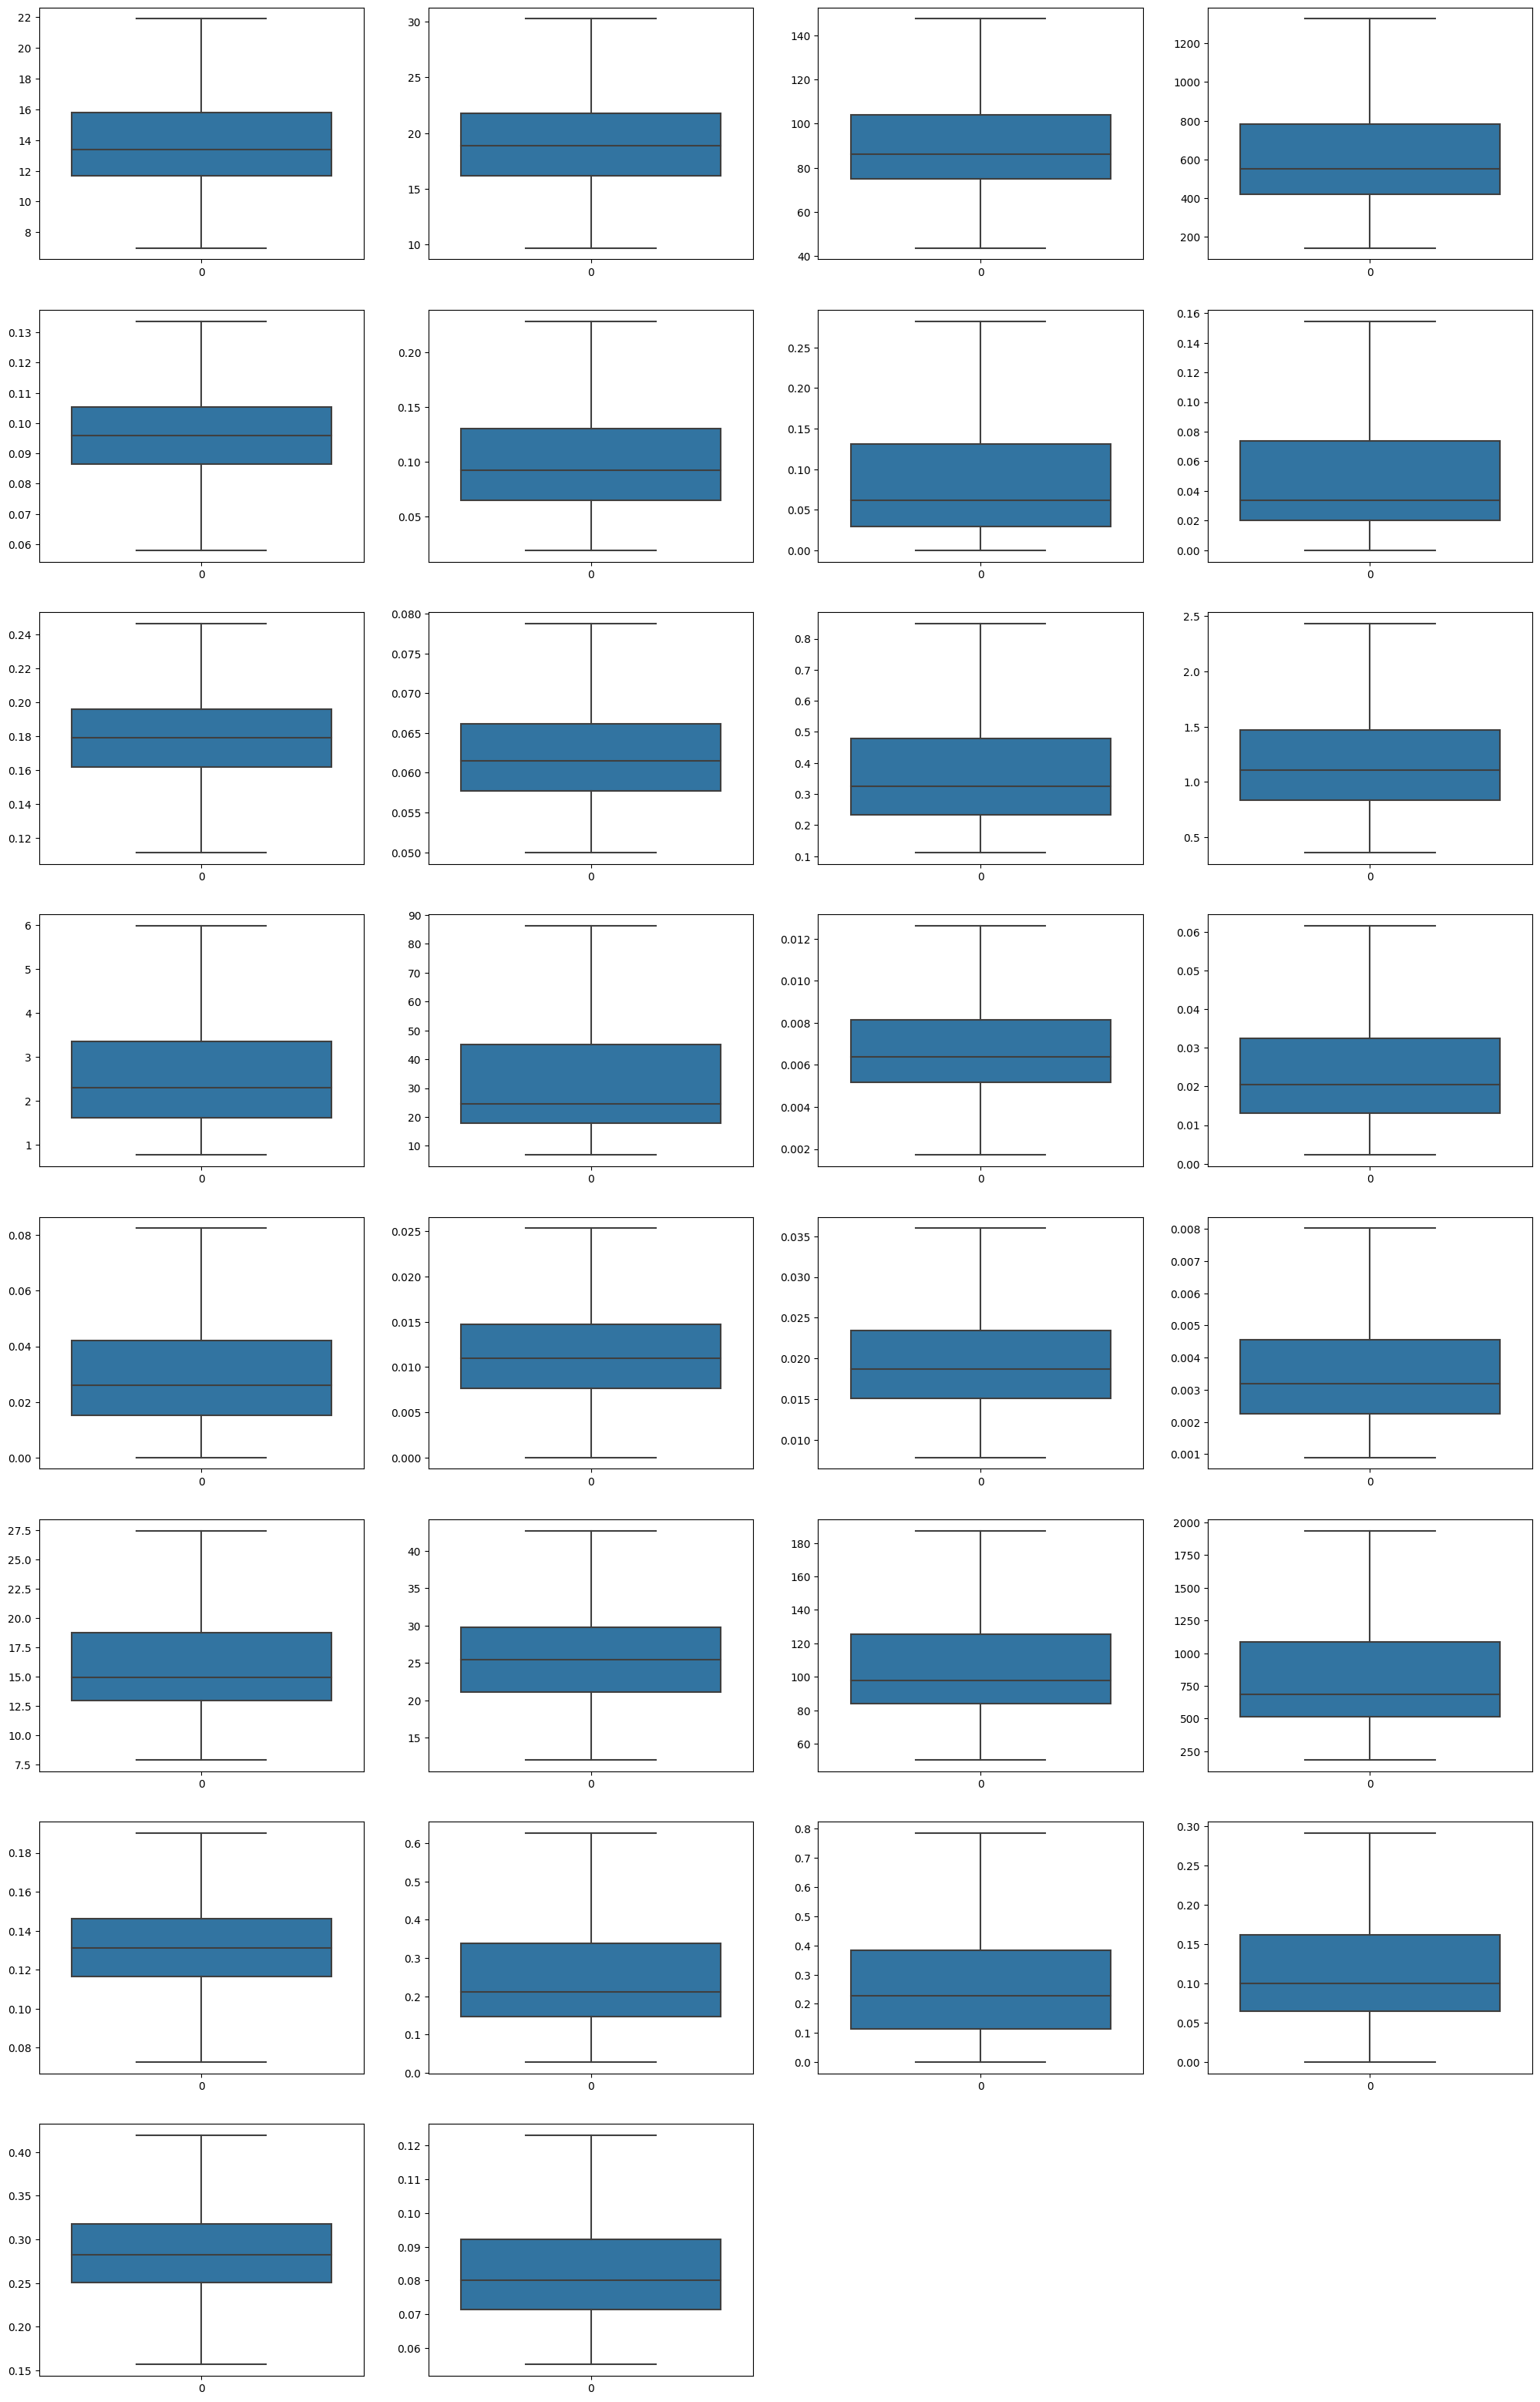

In [22]:
# Again ploting boxplot for checking any outliers remained (if any)
plt.figure(figsize=(25,45))
for i, var in enumerate(num_var):
    plt.subplot(9,4,i+1)
    sns.boxplot(df[var])

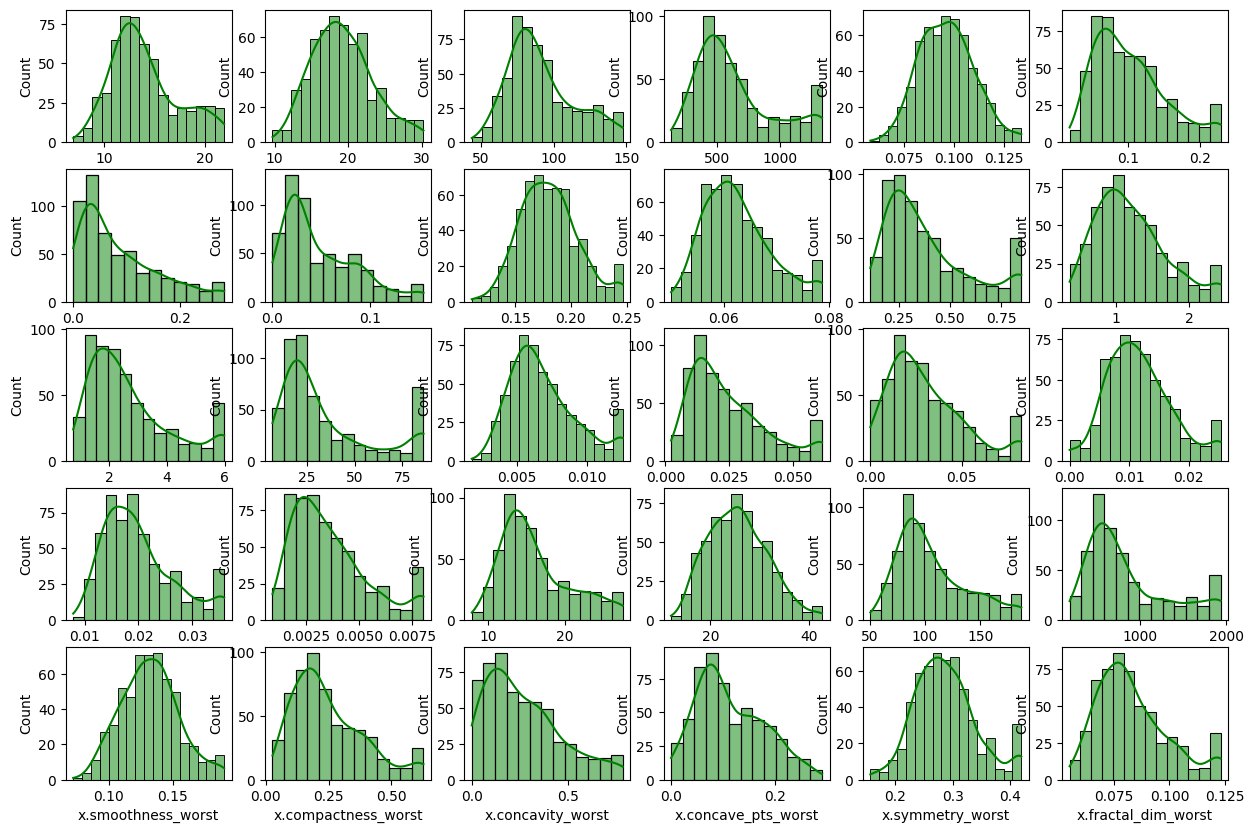

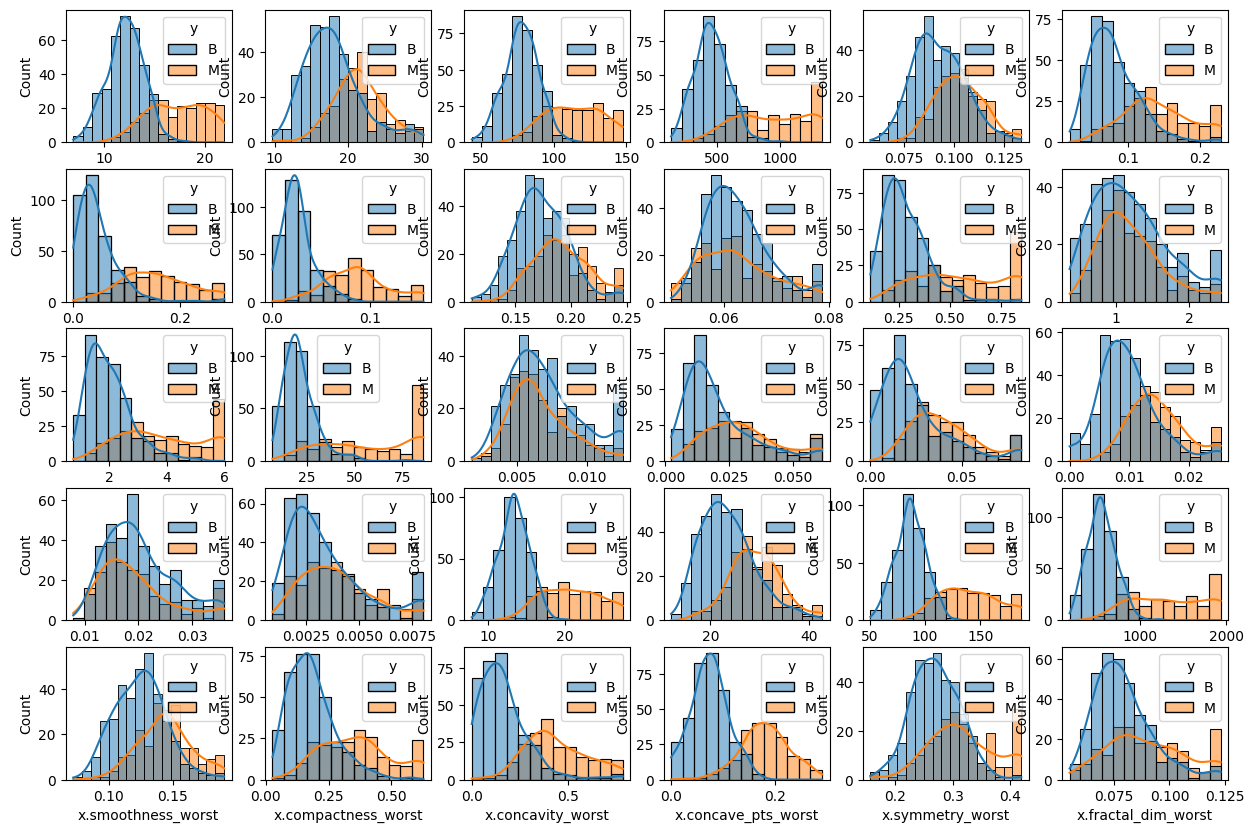

In [23]:
histplots(df, False)
histplots(df, True)

In [24]:
# Replace or convert the Caregorical values to Numerical Values
df['y'].replace({'B': 0, 'M': 1}, inplace=True)


In [25]:
# Defining x and y for the model
x = df.drop(columns='y')
y = df['y']

## Building a Model

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=100)

Training and Predictions

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [43]:
cross_val_score(RandomForestClassifier(), x,y, cv=4 ).mean()

0.9613784103220724

In [44]:
cross_val_score(KNeighborsClassifier(), x,y, cv=4 ).mean()

0.9279892642568699

In [45]:
cross_val_score(LogisticRegression(), x,y, cv=4 ).mean()

0.922682950851965

From the Cross_val_score it is found that RandomForestClassifier has the highest CV Score, so adopting RF model

In [46]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [47]:
y_pred =model.predict(x_test)
y_pred[:5]

array([1, 0, 0, 0, 1], dtype=int64)

In [50]:
list(y_test[:5])

[1, 0, 0, 0, 1]

Evaluation

In [29]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [52]:
print("Classification repoert \n" ,classification_report(y_test, y_pred))
print("Accuricy is ", accuracy_score(y_test, y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test, y_pred))

Classification repoert 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       106
           1       0.97      0.97      0.97        65

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Accuricy is  0.9766081871345029
Confusion Matrix 
 [[104   2]
 [  2  63]]


In [56]:
import pickle
pickle.dump(model, open("trainedmodel.pkl", 'wb'))

## Great JOB!